### This is SA-GA network aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran.  All copyright reserved by the author.
This program uploads on Github for available on Bioinformatics Journal reviewers.
2020/02/28

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "mm-sc-pop.pickle". Therefore, you must run follow steps:
1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections.
2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 
3) Run all remains cells to create results. 

### In the unknown target program, we assume don't have target in a run time of the algorithm. Afterward, run SA-GA aligner, we use target for evaluating criteria and give the performance of SA-GA network aligner method.
#### You can see the comment "****remove for unknown target****", wherever we changed.

# Load Graphs 

In [1]:
import pickle
with open('mm-mm-weighted.pickle', 'rb') as f:
    mmlist = pickle.load(f)

In [2]:
with open('sc-sc-weighted.pickle', 'rb') as f:
    sclist = pickle.load(f)

In [3]:
import networkx as nx
G1=nx.Graph()
for i in range(len(mmlist)):
    if G1.has_node(mmlist[i][0])==False:
        G1.add_node(mmlist[i][0])
    if G1.has_node(mmlist[i][1])==False:
        G1.add_node(mmlist[i][1])
    G1.add_edge(mmlist[i][0],mmlist[i][1],weight=mmlist[i][2])
G1

In [4]:
G2=nx.Graph()
for i in range(len(sclist)):
    if G2.has_node(sclist[i][0])==False:
        G2.add_node(sclist[i][0])
    if G2.has_node(sclist[i][1])==False:
        G2.add_node(sclist[i][1])
    G2.add_edge(sclist[i][0],sclist[i][1],weight=sclist[i][2])
G2

# Swap graphs if len G1 > len G2

In [5]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp

In [6]:
ed1=G1.edges()

In [7]:
nd1=G1.nodes()

In [8]:
ed2=G2.edges()

In [9]:
nd2=G2.nodes()

In [10]:
el1=list(ed1)
el2=list(ed2)

In [11]:
nd1=list(nd1)
nd2=list(nd2)

In [12]:
degG1 = [val for (node, val) in G1.degree()]


In [13]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [14]:
G_target_na=nx.read_weighted_edgelist('mm-sc.evals')
G_target_na 

In [15]:
gtnode=list(G_target_na.nodes())
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

In [16]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            #b=list(a[0][0].values())
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=a[0])
G_target_na=G_target
G_target_na

# Compute Score for create similarity matrix

In [17]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [18]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [19]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [20]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [21]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [22]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [23]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [24]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [25]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [36]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [37]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [38]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])

# multi processing for speed up

In [39]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [40]:
#%%prun
import random
import threading

len_pop=300
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
                   
    print('in for loop')
    
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1task2

task3
Done!, i= 1
wait
in for loop
task1task2

task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2
task3
Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2
task3
Done!, i= 14
wait
in for loop
task1
task2task3

Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1
task2
task3
Done!, i= 173
wait
in for loop
task1
task2
task3
Done!, i= 174
wait
in for loop
task1
task2
task3
Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2
task3
Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2
task3
Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2
task3
Done!, i= 189
wait
i

array([[[0.000e+00, 3.640e+02],
        [1.000e+00, 3.480e+02],
        [2.000e+00, 3.570e+02],
        ...,
        [2.987e+03, 2.466e+03],
        [2.988e+03, 5.320e+03],
        [2.989e+03, 4.318e+03]],

       [[0.000e+00, 3.640e+02],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 4.310e+02],
        ...,
        [2.987e+03, 3.427e+03],
        [2.988e+03, 1.830e+02],
        [2.989e+03, 5.243e+03]],

       [[0.000e+00, 3.640e+02],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 3.570e+02],
        ...,
        [2.987e+03, 4.870e+03],
        [2.988e+03, 2.274e+03],
        [2.989e+03, 4.291e+03]],

       ...,

       [[0.000e+00, 1.530e+02],
        [1.000e+00, 7.630e+02],
        [2.000e+00, 3.570e+02],
        ...,
        [2.987e+03, 2.708e+03],
        [2.988e+03, 2.564e+03],
        [2.989e+03, 5.469e+03]],

       [[0.000e+00, 1.530e+02],
        [1.000e+00, 4.310e+02],
        [2.000e+00, 3.480e+02],
        ...,
        [2.987e+03, 2.247e+03],
        [2.988e+03

# save population

In [41]:
import pickle
with open('mm-sc-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [42]:
import pickle
with open('mm-sc-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

# load population

In [26]:
import pickle
with open('mm-sc-base_permute.pickle', 'rb') as f:
    base_permute = pickle.load(f)

In [27]:
with open('mm-sc-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [28]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j])): #and G_target_na.has_edge(a[i],b[j])): ****remove for unknown target ****
                return True
    return False 

In [29]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [30]:
len_pop=len(pop)
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)
num_seq=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))


for i in range(len(p)):
    ea=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                          
         #if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):  ****remove for unknown target ****
        num_seq[i]+=1  # create sequence matrix 
        map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
        if (ec_func(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])])):
            ea=ea+1                
            
        nc=nc+2
                 
    score_ec[i]=(ea/G1.number_of_edges())*100
    score_ics[i]=(ea/num_induced)*100
    score_s3[i]=(ea/(G1.number_of_edges()+num_induced-ea))*100
    score_nc[i]=(nc/(G1.number_of_nodes()))*100 # node coverage    
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('node coverage: ',score_nc)
print('node correctness',score_ncorectness)

ec
[35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727 35.39772727
 35.39772727 35.39772727 35.39772727 35.39772727

## number of matched sequences 

In [31]:
num_seq

array([623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 623., 623., 623., 623.,
       623., 623., 623., 623., 623., 623., 623., 62

## compute topology score

In [32]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[14627.55205466 13490.17470765 13761.06143921 14159.10822175
 14706.02596248 14534.48183347 15331.1136475  15331.1136475
 14753.51576974 15417.34029489 14534.48183347 12966.90457416
 14381.96907136 14833.35072707 14817.31468916 13424.1112441
 14817.31468916 12833.35047177 12930.20583113 14321.85641313
 14962.89950485 14897.8434882  13216.98922572 13957.24743001
 14519.08515315 12690.75785917 14306.90668366 14611.95766615
 14159.10822175 13788.74966042 14785.34640646 14203.12612639
 14643.17976451 15348.28173027 14690.26389354 13503.46550495
 14277.10066053 13293.90662906 13424.1112441  14159.10822175
 13971.47498547 13706.01725543 16200.96317094 15212.0041187
 13733.48419283 14071.88588498 14188.42311339 13914.73809426
 13371.72452877 14674.53557635 13914.73809426 14397.07616535
 13985.73157675 14865.52715888 13204.25611029 14321.85641313
 15228.90632803 14930.30062941 13872.48691235 13476.91004762
 13985.73157675 14321.85641313 13610.74216862 14144.49615502
 13802.63559612 14427.38576

# Compute Topology and Sequence score

In [33]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([7625.27602733, 7056.58735383, 7192.0307196 , 7391.05411088,
       7664.51298124, 7578.74091673, 7977.05682375, 7977.05682375,
       7688.25788487, 8020.17014744, 7578.74091673, 6794.95228708,
       7502.48453568, 7728.17536354, 7720.15734458, 7023.55562205,
       7720.15734458, 6728.17523589, 6776.60291556, 7472.42820657,
       7792.94975242, 7760.4217441 , 6919.99461286, 7290.12371501,
       7571.04257658, 6656.87892958, 7464.95334183, 7617.47883307,
       7391.05411088, 7205.87483021, 7704.17320323, 7413.0630632 ,
       7633.08988226, 7985.64086513, 7656.63194677, 7063.23275247,
       7450.05033027, 6958.45331453, 7023.55562205, 7391.05411088,
       7297.23749273, 7164.50862771, 8411.98158547, 7917.50205935,
       7178.24209641, 7347.44294249, 7405.7115567 , 7268.86904713,
       6997.36226438, 7648.76778818, 7268.86904713, 7510.03808268,
       7304.36578837, 7744.26357944, 6913.62805514, 7472.42820657,
       7925.95316402, 7776.65031471, 7247.74345618, 7049.95502

## Define function for fitness and compute final score

In [34]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [35]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        #if G_target_na.has_edge(nd1[x1],nd2[x2]):   ****remove for unknown target ****
        num_seq_temp+=1 
        if (ec_func(nd1[x1],nd2[x2])):
            ec_temp=ec_temp+1                
        nc_temp=nc_temp+2
                 
    score_ec_temp=(ec_temp/G1.number_of_edges())*100
    score_ics_temp=(ec_temp/counter_induced)*100
    score_s3_temp=(ec_temp/(G1.number_of_edges()+counter_induced-ec_temp))*100
    score_nc_temp=(nc_temp/G1.number_of_nodes())*100 # node coverage 
    score_ncorectness=(nc/G_target_na.number_of_nodes())*100
    
     # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('node coverage: ',score_nc_temp)
        print('node correctness: ',score_ncorectness)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    return score_temp,pre,rec,fsc


In [36]:
def crossover(index,r1): 
    tp=[]
    
    for i in range(len_pop-1):            
            if (r1>0):
                alpha=random.random()
                P_crossover=(pop[i][dim]*r1-r1*2*alpha)/1000
                print(P_crossover)
                tp.append(pop[i][0:len_G1])                
                for j in range(int(P_crossover)):
                    x=random.randint(0,len_G1-1)
                    #print('x',x)
                    y=np.argmax(m[x])
                    #print('y',y,'index',index,len(tp))
                    #print(tp[index])
                    #print(nd1[int(tp[index][x][0])],nd2[y])
                    #print('crossover ===============',G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y]))
                    #if (G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y])):      ****remove for unknown target ****                                               
                    tp[index][x][1]=y
                    fit,pre,rec,fsc=Fitness(tp[index],counter_induced)
                    tp[index].append(fit)
                    if(fit>pop[i][dim]):
                        pool.append(tp)
                        print('move crossover')
                index=index+1

In [37]:
def mutation(index):   
    tp=[]
    for i in range(len_pop-1):
        pm=random.random()
        if (pm>0.1):               
            tp.append(pop[i][0:len_G1])
            x=random.randint(0,len_G1-1)
            #print('x',x)
            y=np.argmax(m[x])
            #print('y',y,'index',index,len(tp),tp[index])
            #print(nd1[int(tp[index][x][0])],nd2[y])
            #print('mutation=====',G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y]))
            #if (G_target_na.has_edge(nd1[int(tp[index][x][0])],nd2[y])):   ****remove for unknown target ****                                                
            tp[index][x][1]=y                            
            fit,pre,rec,fsc=Fitness(tp[index],counter_induced)
            tp[index].append(fit)
            if(fit>pop[i][dim]):
                pool.append(tp)
                print('move mutation')
            index=index+1

# Hybrid SA-GA proposed method

In [38]:
# Implementation of Hybrid SA-GA Algorithm
import random
from operator import itemgetter
import concurrent.futures

len_G1=len(G1)
pool=[]
dim=len_G1
pop=p.tolist()

[pop[i].append(score[i]) for i in range(len_pop)]
#[print(pop[i][dim]) for i in range(len_pop)]

pop=sorted(pop, key=itemgetter(dim),reverse=True)


GBest=pop[0]
#print("GBest: ",GBest)


iteration=0
max_epoch=2

GbestFlag=False
max_score=max(score)
r1=10 #temperature

while (iteration<max_epoch and r1>0): 
    # counter induced for ics compute            
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future = executor.submit(induced_function_for_pop,GBest)
        counter_induced = future.result()
        #print("counter induced: ",counter_induced)
    
    index=0
    print('it',iteration)
    crossover(index,r1)
    mutation(index)
                
    # selection
    if(len(pool)>0):
        pool=pool[0][0:len(pool[0])]
        pool=sorted(pool, key=itemgetter(dim), reverse=True)
        pop[-len(pool):]=pool[0:]
        pop=sorted(pop, key=itemgetter(dim),reverse=True)
        pool=[]
    if (pop[0][dim]>GBest[dim]):
        GBest=pop[0]
    r1=r1-0.1
    iteration=iteration+1
    
#print("GBest: ",GBest)    
print("score:", score)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(pop[i][j][0])],nd2[int(pop[i][j][1])]):
            map_items.append([nd1[int(pop[i][j][0])],nd2[int(pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(pop[i][j][0])],nd2[int(pop[i][j][1])])) 

print("end")

it 0
84.10651589456988
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
score: 8411.981585468424
sc

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
80.70869702294426
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
79.50868726793611
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
78.57252446246244
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
78.49583772399644
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
77.42514615351938
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
77.19719769327268
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
76.70902438368596
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
76.3925585578562
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.98158546842

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
76.32136763787365
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
76.16621453714828
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
76.16567738620103
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
75.23681247659601
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
75.17354688423325
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
75.08372556412154
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
74.70730368134083
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
74.6453310766216
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.98158546842

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
74.4888298908659
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.98158546842

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
73.90835556015496
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
73.60617259416395
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
73.46190049500844
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
73.25620834834228
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
73.03317139352514
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
72.95844900831685
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
72.74013318074984
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
72.39755418804162
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
71.77311381458189
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
70.01902368267902
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
68.61662727859621
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
66.54931068818574
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.9815854684

score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover
score: 8411.981585468424
move crossover


score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424
move mutation
score: 8411.981585468424


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.26301907789559
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.26612239074775
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.26298481867812
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.26705477296176
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.25941469918783
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.27144409946155
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.27325870523755
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.2776565331717
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.84211155026

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
83.26410565138141
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.8421115502

score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover
score: 8469.842111550264
move crossover


score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264
move mutation
score: 8469.842111550264


end


In [39]:
# Gbest
gb=pop[0]
#del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
35.39772727272727
ics
74.16666666666667
s3
31.512392513909965
node coverage:  200.0
node correctness:  116.23134328358209
num_seq 623
precision:  18.66387058118634
Recall:  88.24362606232295
F-score:  30.811078140454995
score: 8469.842111550264
gbest fitness  8469.842111550264


# create weighted graph of network alignment

In [40]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['mm5453', 'sc1710', 49],
 ['mm14022', 'sc5612', 146],
 ['mm9696', 'sc1643', 50],
 ['mm5042', 'sc1429', 232],
 ['mm3362', 'sc2151', 66],
 ['mm9669', 'sc3705', 110],
 ['mm3314', 'sc1138', 77],
 ['mm8390', 'sc678', 52],
 ['mm5138', 'sc610', 67],
 ['mm3178', 'sc944', 77],
 ['mm9309', 'sc1138', 73],
 ['mm1793', 'sc792', 220],
 ['mm2048', 'sc315', 56],
 ['mm3367', 'sc1709', 70],
 ['mm407', 'sc2616', 64],
 ['mm8699', 'sc329', 160],
 ['mm14063', 'sc2060', 177],
 ['mm11243', 'sc3398', 344],
 ['mm2153', 'sc2060', 82],
 ['mm6374', 'sc143', 77],
 ['mm3821', 'sc453', 96],
 ['mm7887', 'sc3173', 142],
 ['mm8967', 'sc1892', 72],
 ['mm2895', 'sc2206', 142],
 ['mm1347', 'sc143', 108],
 ['mm4294', 'sc3017', 238],
 ['mm11480', 'sc3010', 350],
 ['mm5183', 'sc1128', 209],
 ['mm5034', 'sc2646', 60],
 ['mm6549', 'sc2206', 166],
 ['mm592', 'sc2193', 115],
 ['mm5688', 'sc1122', 197],
 ['mm1150', 'sc878', 260],
 ['mm14346', 'sc3922', 369],
 ['mm2301', 'sc357', 304],
 ['mm7826', 'sc834', 297],
 ['mm6126', 'sc40

## Remove duplication and local alignment
## Compute Global Alignment

In [41]:
unique_xmap=list(set(tuple(y) for y in x))

In [42]:
unique_xmap

[('mm1125', 'sc109', 71),
 ('mm3362', 'sc898', 66),
 ('mm1092', 'sc1585', 50),
 ('mm2123', 'sc3287', 73),
 ('mm3940', 'sc480', 276),
 ('mm5688', 'sc400', 162),
 ('mm2952', 'sc391', 218),
 ('mm6519', 'sc2060', 54),
 ('mm592', 'sc2652', 113),
 ('mm3405', 'sc3919', 60),
 ('mm9309', 'sc2995', 53),
 ('mm3299', 'sc1501', 57),
 ('mm1125', 'sc198', 98),
 ('mm6549', 'sc2144', 137),
 ('mm8699', 'sc2271', 132),
 ('mm412', 'sc1096', 148),
 ('mm2078', 'sc528', 741),
 ('mm12463', 'sc2023', 78),
 ('mm3734', 'sc3494', 49),
 ('mm3290', 'sc5302', 49),
 ('mm755', 'sc143', 87),
 ('mm6549', 'sc401', 117),
 ('mm2301', 'sc2652', 69),
 ('mm14063', 'sc2066', 80),
 ('mm1793', 'sc792', 220),
 ('mm5183', 'sc2083', 121),
 ('mm988', 'sc39', 74),
 ('mm3405', 'sc3408', 54),
 ('mm8981', 'sc2374', 55),
 ('mm303', 'sc3569', 128),
 ('mm9669', 'sc1379', 58),
 ('mm20200', 'sc4683', 133),
 ('mm244', 'sc34', 135),
 ('mm2895', 'sc61', 76),
 ('mm1347', 'sc401', 88),
 ('mm3970', 'sc1169', 131),
 ('mm10384', 'sc637', 99),
 ('mm1

In [43]:
print(len(x))
print(len(unique_xmap))

56317
2745


# Compute Global Measures

In [44]:
len(map_items)

56317

In [45]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

2745


In [46]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [47]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [48]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorectness=0
len_unique=len(unique_map)

count_induced=induced_function()

for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1 
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=(ec_temp/G1.number_of_edges())*100
score_ics_temp=(ec_temp/count_induced)*100
score_s3_temp=(ec_temp/(G1.number_of_edges()+count_induced-ec_temp))*100
score_nc_temp=(nc_temp/G1.number_of_nodes())*100 #node coverage 
score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('node coverage: ',score_nc_temp)
print('node correctness: ',score_ncorectness)
print('num_seq',num_seq_temp)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
155.9659090909091
ics
43.57142857142857
s3
51.64628410159925
node coverage:  881.2199036918138
node correctness:  512.1268656716418
num_seq 2745
score: 6165.390090104491


# save and load map

In [49]:
import pickle
with open('mm-sc-weightGraph-unknown.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('mm-sc-weightGraph-unknown.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

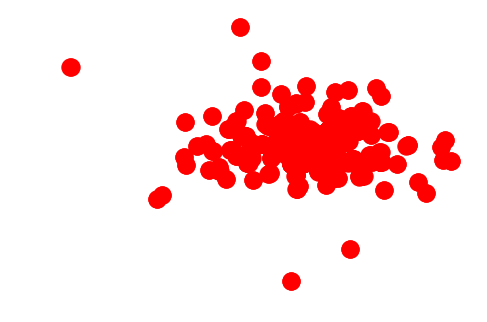

In [51]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [52]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  1059  nodes.
Aligned graph have  2745  edges.


In [53]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  1072  nodes.
Target graph have  3338  edges.


In [54]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  320152
Total Weight in Target:  365195


In [55]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  112
number of different connected components in Target graph:  112


In [56]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'sc571', 'sc109', 'sc97', 'sc493', 'sc302', 'mm1125', 'sc384', 'sc271', 'sc145', 'sc385', 'sc198', 'sc569', 'sc319', 'sc619'}, {'sc1756', 'sc3601', 'sc279', 'sc3219', 'sc588', 'sc585', 'sc2995', 'mm5138', 'sc2776', 'sc3877', 'sc2495', 'sc924', 'mm9309', 'sc486', 'mm1793', 'sc2613', 'sc3741', 'mm9669', 'sc806', 'sc1138', 'sc235', 'sc716', 'sc610', 'sc1429', 'sc2210', 'sc2019', 'sc2577', 'mm3362', 'sc3432', 'sc2287', 'mm3314', 'sc1554', 'sc851', 'sc1134', 'sc1353', 'sc1379', 'sc944', 'sc4984', 'sc3927', 'sc1584', 'sc2882', 'sc792', 'sc2104', 'sc2474', 'sc3610', 'mm8390', 'mm3178', 'sc2540', 'sc2471', 'mm5042', 'sc1827', 'sc2501', 'sc2182', 'sc1131', 'sc2327', 'sc3705', 'sc3448', 'sc898', 'sc2151', 'sc3309', 'mm6556', 'sc322', 'mm7403', 'sc2846', 'sc678', 'sc2834'}, {'sc1852', 'mm14749', 'mm603', 'mm1377', 'sc453', 'sc3027', 'sc2292', 'mm3970', 'sc1933', 'sc20', 'sc3225', 'sc2005', 'sc2600', 'mm2895', 'sc260', 'mm806', 'mm2300', 'sc1603', 'sc59', 'sc252', 'sc146', 'mm6549', 'sc1274', 'm

In [57]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [58]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

109


In [59]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  307
Largest common connected graph in Target graph:  317


### check for mistake align

In [60]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# Compute Global Criteria Percents

In [61]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("Percent of EC: ",ratio_ec)
print("EC:",ratio_ec/100)

total EC:  189.6590909090909
Percent of EC:  82.23487118034751
EC: 0.8223487118034751


In [62]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("Percent of ICS: ",ratio_ics)
print("ICS:", ratio_ics/100)

total ICS:  52.98412698412699
Percent of ICS:  82.2348711803475
ICS: 0.822348711803475


In [63]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("Percent of S3: ",ratio_s3)
print("S3:",ratio_s3/100)

total S3:  70.69038542990258
Percent of S3:  73.05984227913471
S3: 0.7305984227913471


# compute FC

In [64]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['mm1125', 'sc109'],
 ['mm3362', 'sc898'],
 ['mm1092', 'sc1585'],
 ['mm2123', 'sc3287'],
 ['mm3940', 'sc480'],
 ['mm5688', 'sc400'],
 ['mm2952', 'sc391'],
 ['mm6519', 'sc2060'],
 ['mm592', 'sc2652'],
 ['mm3405', 'sc3919'],
 ['mm9309', 'sc2995'],
 ['mm3299', 'sc1501'],
 ['mm1125', 'sc198'],
 ['mm6549', 'sc2144'],
 ['mm8699', 'sc2271'],
 ['mm412', 'sc1096'],
 ['mm2078', 'sc528'],
 ['mm12463', 'sc2023'],
 ['mm3734', 'sc3494'],
 ['mm3290', 'sc5302'],
 ['mm755', 'sc143'],
 ['mm6549', 'sc401'],
 ['mm2301', 'sc2652'],
 ['mm14063', 'sc2066'],
 ['mm1793', 'sc792'],
 ['mm5183', 'sc2083'],
 ['mm988', 'sc39'],
 ['mm3405', 'sc3408'],
 ['mm8981', 'sc2374'],
 ['mm303', 'sc3569'],
 ['mm9669', 'sc1379'],
 ['mm20200', 'sc4683'],
 ['mm244', 'sc34'],
 ['mm2895', 'sc61'],
 ['mm1347', 'sc401'],
 ['mm3970', 'sc1169'],
 ['mm10384', 'sc637'],
 ['mm18649', 'sc4934'],
 ['mm20200', 'sc5262'],
 ['mm1435', 'sc905'],
 ['mm2153', 'sc3287'],
 ['mm4686', 'sc1458'],
 ['mm3290', 'sc3172'],
 ['mm7391', 'sc916'],
 ['mm161

# load ontology and create DAG graph

In [65]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

,0
0,GO:0046431 GO:0019599\n
1,GO:0046430 GO:0019595\n
2,GO:0046432 GO:0019361\n
3,GO:0034198 GO:0060733\n
4,GO:0046343 GO:0019872\n
5,GO:0034193 GO:0034195\n
6,GO:0034192 GO:0034194\n
7,GO:0034190 GO:0034191\n
8,GO:0046437 GO:0030632 GO:0070179\n
9,GO:0046340 GO:0046342\n


In [66]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [67]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0045061', '0070588', '0005654', '0075079', '0050455', '0006110', '0005458', '0047920', '0001850', '0033789', '0050275', '0009074', '0015434', '0046126', '0071501', '0004582', '0009675', '0072238', '0008092', '0002907', '0044125', '0035546', '0005589', '0001656', '0071300', '0051696', '0070882', '0009076', '0009721', '0010589', '0070804', '0006145', '0002112', '0060684', '0034226', '0006598', '0006915', '0035344', '0030266', '0048406', '0090188', '0052179', '0000801', '0015887', '0051101', '0018065', '0042627', '0033887', '0046013', '0008955', '2000008', '0070304', '0042767', '0009019', '0032186', '0035085', '0070334', '0070286', '0051524', '0075108', '0050114', '0051482', '0035530', '0034990', '0018101', '0047797', '0042527', '0072105', '0007254', '0016064', '0071141', '0019826', '0015118', '0033472', '0050562', '0030291', '0060418', '0002485', '0007183', '0050964', '0010065', '0046158', '0050813', '0016036', '0008906', '0000456', '2000006', '0030819', '0014730', '0042256', '0044164'

In [68]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [69]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [70]:
# To unify the data, we need to delete the two letters of annotations and replace zero to achieve string with 7 lengths.
## According to species, these letters are different.
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('mm' in tree[i][j] or 'sc' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

2745 5490
2745


In [71]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.6291371158392435
